<a href="https://colab.research.google.com/github/pallavi232003/Rproject1/blob/main/Rproject1_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving bangalore_traffic_pollution.csv to bangalore_traffic_pollution.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bangalore_traffic_pollution.csv")
df.head()

,Date,Time,Area,Traffic_Volume,AQI
0,2025-04-01,08:00 AM,Koramangala,982,133
1,2025-04-01,12:00 PM,Koramangala,517,137
2,2025-04-01,04:00 PM,Koramangala,953,142
3,2025-04-01,08:00 PM,Koramangala,601,107
4,2025-04-01,08:00 AM,Whitefield,894,156


In [4]:
df.tail()

,Date,Time,Area,Traffic_Volume,AQI
715,2025-04-30,08:00 PM,Electronic City,577,151
716,2025-04-30,08:00 AM,Jayanagar,707,130
717,2025-04-30,12:00 PM,Jayanagar,617,103
718,2025-04-30,04:00 PM,Jayanagar,866,145
719,2025-04-30,08:00 PM,Jayanagar,645,104


In [5]:
df.shape

(720, 5)

In [6]:
df.size

3600

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            720 non-null    object
 1   Time            720 non-null    object
 2   Area            720 non-null    object
 3   Traffic_Volume  720 non-null    int64 
 4   AQI             720 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 28.3+ KB


In [8]:
df.columns

Index(['Date', 'Time', 'Area', 'Traffic_Volume', 'AQI'], dtype='object')

In [9]:
df.nunique()

,0
Date,30
Time,4
Area,6
Traffic_Volume,443
AQI,88


In [10]:
df.describe()

,Traffic_Volume,AQI
count,720.000000,720.000000
mean,674.856944,131.648611
std,196.994639,17.273634
min,300.000000,80.000000
25%,505.000000,120.000000
50%,699.500000,131.000000
75%,844.500000,144.000000
max,999.000000,178.000000


In [11]:
cat_cols = df.select_dtypes(include=['object' , 'category']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:",list(cat_cols))
print("Numerical Columns:", list(num_cols))

Categorical Columns: ['Date', 'Time', 'Area']
Numerical Columns: ['Traffic_Volume', 'AQI']


In [12]:
df.isnull().sum()

,0
Date,0
Time,0
Area,0
Traffic_Volume,0
AQI,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.head()

,Date,Time,Area,Traffic_Volume,AQI
0,2025-04-01,08:00 AM,Koramangala,982,133
1,2025-04-01,12:00 PM,Koramangala,517,137
2,2025-04-01,04:00 PM,Koramangala,953,142
3,2025-04-01,08:00 PM,Koramangala,601,107
4,2025-04-01,08:00 AM,Whitefield,894,156


# **EDA**

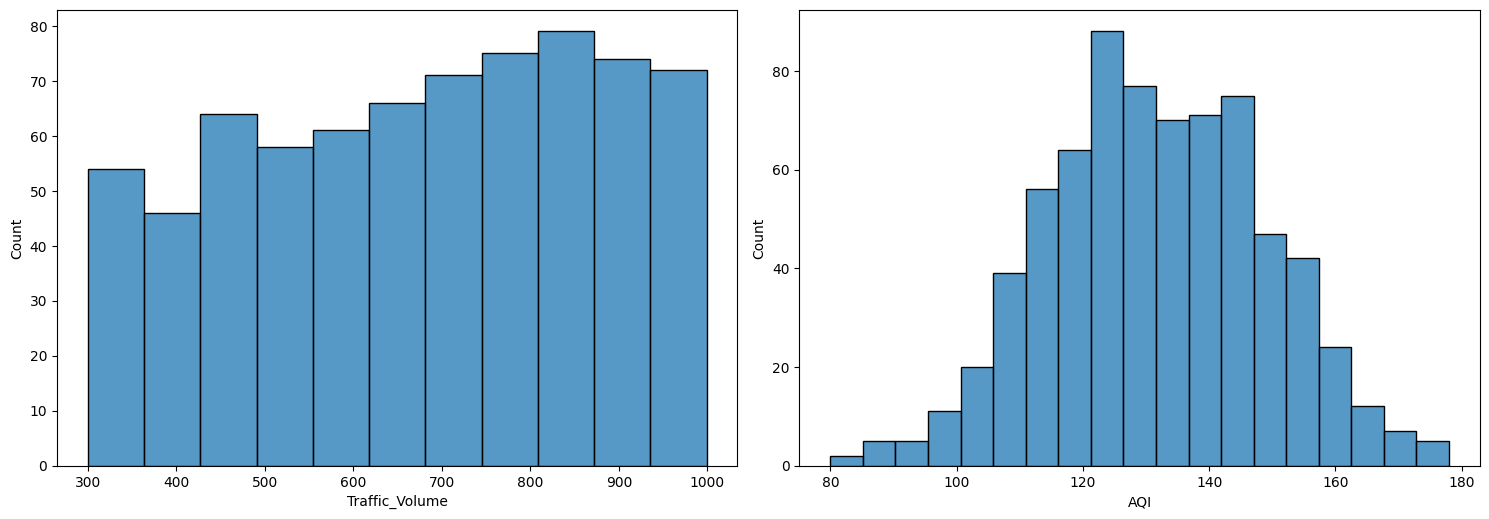

In [15]:
plt.figure(figsize=(15,10))
plotnum=1
for i in num_cols:
  plt.subplot(2,2,plotnum)
  sns.histplot(df[i])
  plotnum+=1
plt.tight_layout()

<Axes: xlabel='AQI', ylabel='Count'>

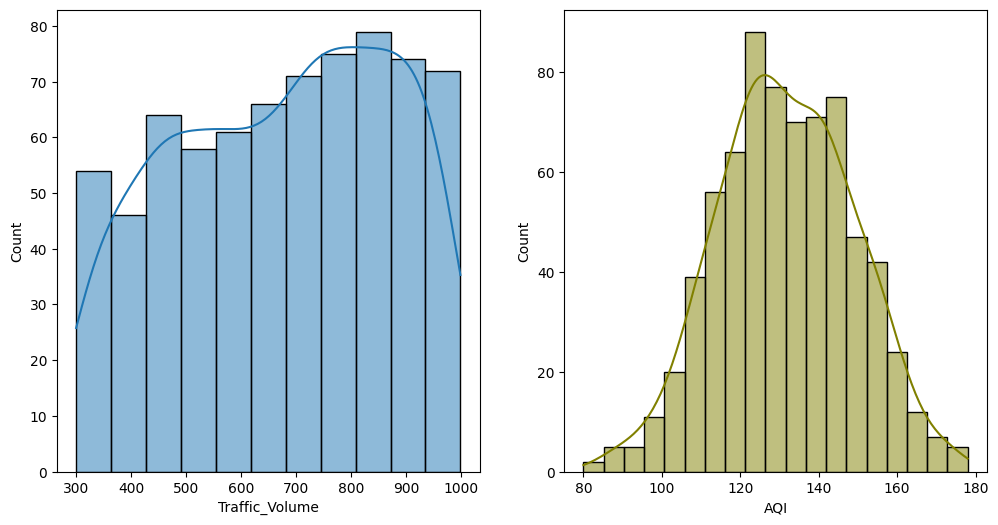

In [16]:
'''sns.histplot(df['Traffic_Volume'], kde=True)
plt.show()

sns.histplot(df['AQI'], kde=True, color='Olive')
plt.show()'''

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

sns.histplot(df['Traffic_Volume'], kde=True, ax=axes[0])
#axes[0].set_title('Traffic Volume Distribution')

sns.histplot(df['AQI'], kde=True, color='Olive', ax=axes[1])
#axes[1].set_title('AQI Distribution')

#plt.tight_layout()  # Adjusts subplot params for a tight layout
#plt.show()

                 Traffic_Volume         AQI
Area                                       
MG Road              679.408333  130.666667
Indiranagar          678.783333  133.550000
Electronic City      678.483333  132.575000
Koramangala          673.591667  132.541667
Whitefield           669.716667  131.341667
Jayanagar            669.158333  129.216667


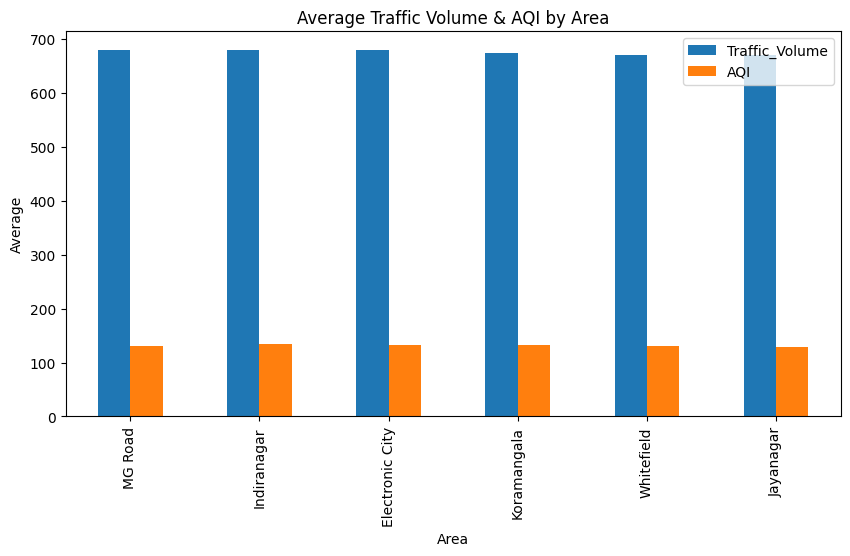

In [17]:
# Group by Area
area_stats = df.groupby('Area')[['Traffic_Volume', 'AQI']].mean().sort_values(by='Traffic_Volume', ascending=False)
print(area_stats)

# Visualize
area_stats.plot(kind='bar', figsize=(10,5))
plt.title('Average Traffic Volume & AQI by Area')
plt.ylabel('Average')
plt.show()

          Traffic_Volume         AQI
Time                                
04:00 PM      851.772222  140.000000
08:00 AM      836.861111  138.550000
12:00 PM      514.194444  123.711111
08:00 PM      496.600000  124.333333


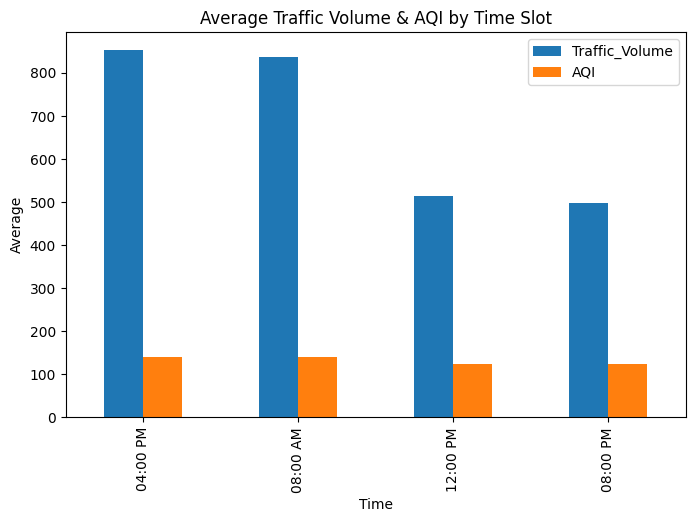

In [18]:
# Group by Time
time_stats = df.groupby('Time')[['Traffic_Volume', 'AQI']].mean().sort_values(by='Traffic_Volume', ascending=False)
print(time_stats)

# Visualize
time_stats.plot(kind='bar', figsize=(8,5))
plt.title('Average Traffic Volume & AQI by Time Slot')
plt.ylabel('Average')
plt.show()

Correlation between Traffic Volume and AQI: 0.51


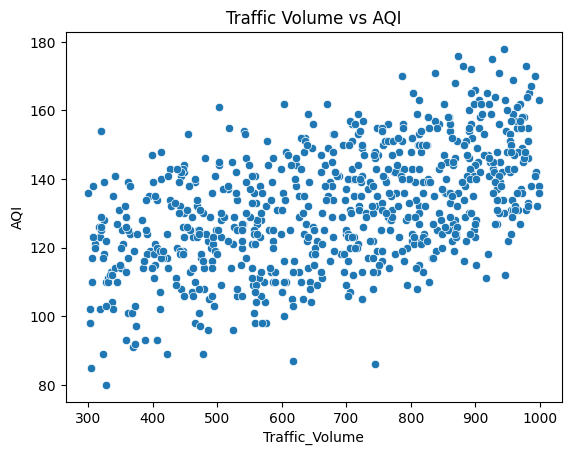

In [19]:
#correlation coefficient
corr = df['Traffic_Volume'].corr(df['AQI'])
print(f'Correlation between Traffic Volume and AQI: {corr:.2f}')

# Scatter plot
sns.scatterplot(data=df, x='Traffic_Volume', y='AQI')
plt.title('Traffic Volume vs AQI')
plt.show()

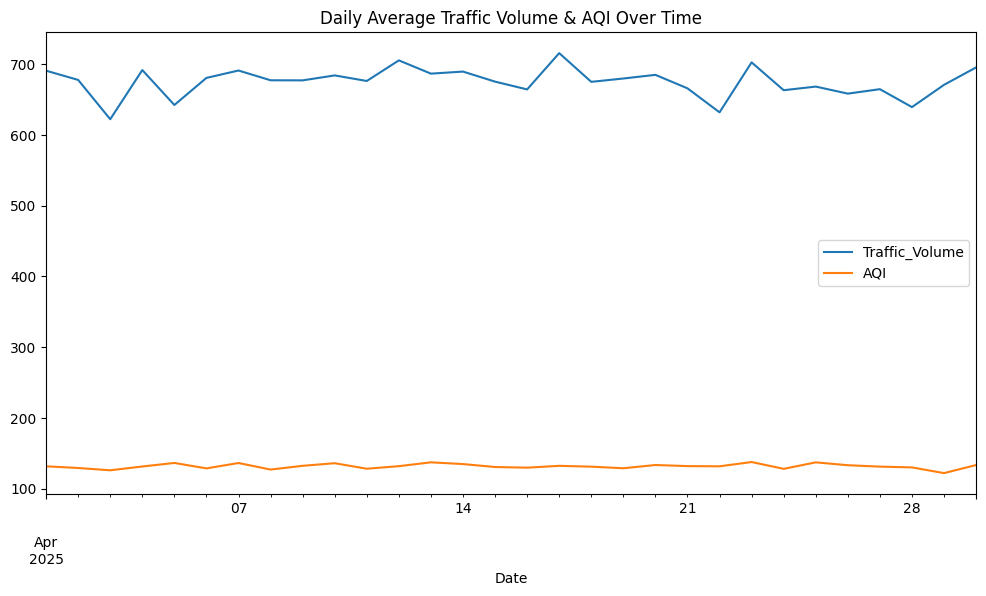

In [20]:
# Convert Date to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date
daily_avg = df.groupby('Date')[['Traffic_Volume', 'AQI']].mean()

# Plot
daily_avg.plot(figsize=(12,6))
plt.title('Daily Average Traffic Volume & AQI Over Time')
plt.show()

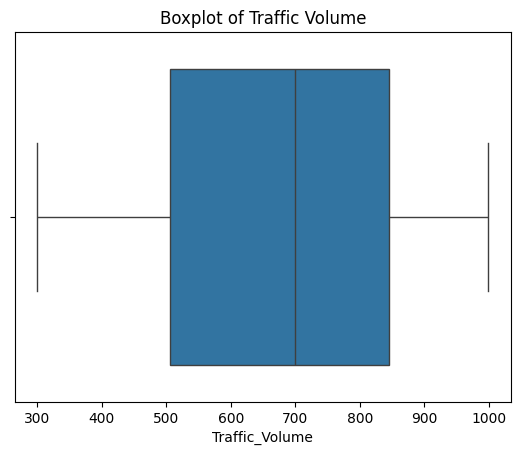

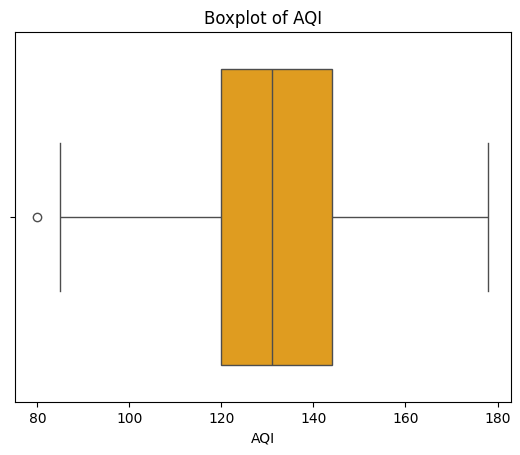

In [21]:
# Traffic Volume Boxplot
sns.boxplot(x=df['Traffic_Volume'])
plt.title('Boxplot of Traffic Volume')
plt.show()

# AQI Boxplot
sns.boxplot(x=df['AQI'], color='orange')
plt.title('Boxplot of AQI')
plt.show()



In [22]:
# Function to detect outliers using IQR
def find_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers for Traffic Volume
traffic_outliers = find_outliers_IQR(df, 'Traffic_Volume')
print(f'Traffic Volume Outliers: {len(traffic_outliers)} rows')

# Find outliers for AQI
aqi_outliers = find_outliers_IQR(df, 'AQI')
print(f'AQI Outliers: {len(aqi_outliers)} rows')


Traffic Volume Outliers: 0 rows
AQI Outliers: 1 rows


In [23]:
from scipy import stats

# Z-score for Traffic Volume
df['Traffic_Zscore'] = stats.zscore(df['Traffic_Volume'])
traffic_z_outliers = df[np.abs(df['Traffic_Zscore']) > 3]
print(f'Traffic Volume Outliers (Z-score): {len(traffic_z_outliers)} rows')

# Z-score for AQI
df['AQI_Zscore'] = stats.zscore(df['AQI'])
aqi_z_outliers = df[np.abs(df['AQI_Zscore']) > 3]
print(f'AQI Outliers (Z-score): {len(aqi_z_outliers)} rows')


Traffic Volume Outliers (Z-score): 0 rows
AQI Outliers (Z-score): 0 rows


<Axes: xlabel='Traffic_Volume'>

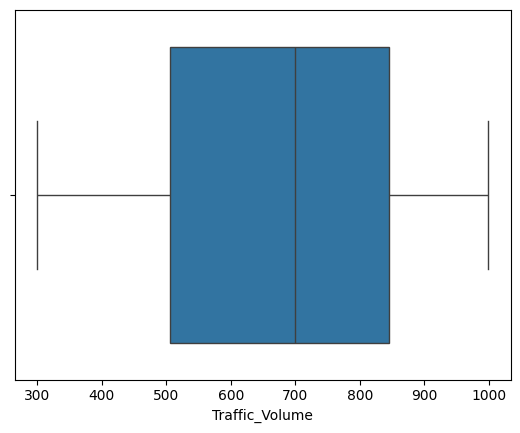

In [24]:
sns.boxplot(x=df['Traffic_Volume'])
